# Topic distribution

Using the bag of words generated from the corpus, and the topic models generated, I now use them to project publications in the LDA topic space, as well as for the individuals in the School

## Setup

In [1]:
import pandas as pd
import cPickle as pkl

In [2]:
from gensim import models
from gensim.corpora import Dictionary

In [3]:
lookup_pub = pkl.load(open('../infnet-analysis/data/lookup_pub.pkl', 'rb'))
lookup_poinf = pkl.load(open('../infnet-analysis/data/lookup_poinf.pkl','rb'))
pub_toks = pkl.load(open('../infnet-scrapper/data/pub_toks.pkl','rb'))

In [4]:
lookup_pub.head(4)

,year,authors,shortnames,collab_id,edges
pub_id,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,"brien, d. p.|galvao, r.|keilhacker, m.|lazzaro...","[324, 1942, 560, 5635, 5099, a78a09b5-138e-407...","[(324, 1942), (324, 560), (324, 5635), (324, 5..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,paolo guagliardo|piotr wieczorek,"guagliardo, p.|wieczorek, p.","[653c9723-b374-4ad3-9cef-0f7e7f45d812, 4953]","[(653c9723-b374-4ad3-9cef-0f7e7f45d812, 4953)]"
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,"buneman, p.|libkin, l.|suciu, d.|tannen, v. |w...","[90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33f...","[(90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,p.l. de leon|m. pucher|j. yamagishi|i. hernaez...,"leon, p. l.|pucher, m.|yamagishi, j.|hernaez, ...","[1180, 5318, 4d11a99a-0d04-42f4-8089-d433a57c2...","[(1180, 5318), (1180, 4d11a99a-0d04-42f4-8089-..."


In [5]:
lookup_poinf.head(4)

,last_name,first_name,perseonal_url,position,parent,institute,full_name,institute_class,alias
id,,,,,,,,,
003ec9bb-18aa-4e6e-95e9-359f0968262a,gray,gavin,http://www.research.ed.ac.uk/portal/en/persons...,research assistant,school of informatics,institute for computing systems architecture,gray gavin,5,NaN
010f9bf0-c04c-4cfb-ab3d-ca150de1e706,jackson,paul,http://www.research.ed.ac.uk/portal/en/persons...,senior lecturer,school of informatics,institute for computing systems architecture,jackson paul,5,"jackson, p. b.|jackson, p."
02c86de2-0fc9-4f6d-aee9-93b0f7557c84,franke,bjoern,http://www.research.ed.ac.uk/portal/en/persons...,reader,school of informatics,institute of language cognition and computation,franke bjoern,2,"franke, b."
02df029e-077b-407c-8e24-1392a9ed8060,sevilla-lara,laura,http://www.research.ed.ac.uk/portal/en/persons...,lecturer reader in image and vision computing,school of informatics,UNKNOWN,sevilla-lara laura,0,NaN


In [6]:
pub_toks.head(4)

,year,summary_toks
pub_id,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehens, syntax, syntax, comprehens, close..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,"[evalu, speaker, verif, secur, detect, hmmbase..."


# Topic Distribution by Publications

In [7]:
# Load Dictionary to convert words to id:
dictionary = pkl.load(open('../topicModel/dictionary.pkl','rb'))

In [8]:
# Convert tokens to bow:
bowified = lambda row: dictionary.doc2bow(row.summary_toks)
pub_toks['bow'] = pub_toks.apply(bowified, axis=1)

In [9]:
pub_toks.head(4)

,year,summary_toks,bow
pub_id,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[balloon, stabil, analysi, jet, hmode, dischar...","[(40, 2), (156, 1), (223, 2), (293, 2), (328, ..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[queri, process, data, integr, chapter, illust...","[(40, 1), (229, 1), (253, 1), (319, 2), (330, ..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehens, syntax, syntax, comprehens, close...","[(90, 3), (123, 1), (186, 1), (189, 5), (196, ..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,"[evalu, speaker, verif, secur, detect, hmmbase...","[(18, 1), (28, 1), (29, 2), (30, 1), (63, 1), ..."


In [10]:
# load the LDA models:
fullpubLDA = models.LdaModel.load('fullpub.ldamodel')

In [13]:
def inference(ldaModel, ldaVector):
    num_topics = ldaModel.num_topics
    topic_dist = ldaModel[ldaVector]
    
    # index the topic_distribution according to the distribution:
    out = [0]*num_topics
    for (i,v) in topic_dist:
        out[i] = v
    assert len(out) == num_topics
    return out

In [14]:
_inference = lambda row: inference(fullpubLDA, row.bow)
pub_toks['topic_distribution'] = pub_toks.apply(_inference, axis=1)

In [15]:
pub_toks.head(4)

,year,summary_toks,bow,topic_distribution
pub_id,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[balloon, stabil, analysi, jet, hmode, dischar...","[(40, 2), (156, 1), (223, 2), (293, 2), (328, ...","[0, 0.0982922003593, 0, 0.0248418858752, 0.422..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[queri, process, data, integr, chapter, illust...","[(40, 1), (229, 1), (253, 1), (319, 2), (330, ...","[0, 0, 0, 0, 0, 0.153429075164, 0, 0, 0.341365..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehens, syntax, syntax, comprehens, close...","[(90, 3), (123, 1), (186, 1), (189, 5), (196, ...","[0, 0.298135265913, 0, 0, 0, 0, 0, 0, 0, 0.181..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,"[evalu, speaker, verif, secur, detect, hmmbase...","[(18, 1), (28, 1), (29, 2), (30, 1), (63, 1), ...","[0, 0, 0, 0, 0.132472201269, 0, 0, 0, 0.122855..."


In [90]:
def best_topic(topic_dist):
    """
    Assign the pulbication with the topic that best describes it;
    this is equivalent to the index that have the highest topic_distribution
    """
    a = np.argmax(topic_dist)
    assert a < 20
    assert a >= 0
    return a

In [91]:
pub_toks['best_topic'] = pub_toks.apply(lambda row: best_topic(row.topic_distribution), axis=1)

In [92]:
pub_toks.head(4)

,year,summary_toks,bow,topic_distribution,best_topic
pub_id,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[balloon, stabil, analysi, jet, hmode, dischar...","[(40, 2), (156, 1), (223, 2), (293, 2), (328, ...","[0, 0.0982922003593, 0, 0.0248418858752, 0.422...",4
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[queri, process, data, integr, chapter, illust...","[(40, 1), (229, 1), (253, 1), (319, 2), (330, ...","[0, 0, 0, 0, 0, 0.153429075164, 0, 0, 0.341365...",18
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehens, syntax, syntax, comprehens, close...","[(90, 3), (123, 1), (186, 1), (189, 5), (196, ...","[0, 0.298135265913, 0, 0, 0, 0, 0, 0, 0, 0.181...",18
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,"[evalu, speaker, verif, secur, detect, hmmbase...","[(18, 1), (28, 1), (29, 2), (30, 1), (63, 1), ...","[0, 0, 0, 0, 0.132472201269, 0, 0, 0, 0.122855...",13


## Clustering

In [62]:
## Our dataset will be the topic_distribution:
data = pub_toks.topic_distribution.values

In [67]:
data = list(data)
data[1]

[0,
 0,
 0,
 0,
 0,
 0.15342907516391038,
 0,
 0,
 0.34136581260169824,
 0,
 0,
 0,
 0.043999393776760681,
 0,
 0,
 0,
 0,
 0,
 0.44908450613435019,
 0]

In [70]:
import numpy as np

In [72]:
data = np.array(data)

In [76]:
n_samples, n_features = data.shape

### Visualisation

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
rng = np.random.RandomState(1234567)

In [104]:
from sklearn import manifold

#### `TSNE`

In [80]:
x_components = manifold.TSNE(n_components=2, init='pca', random_state=rng).fit_transform(data)

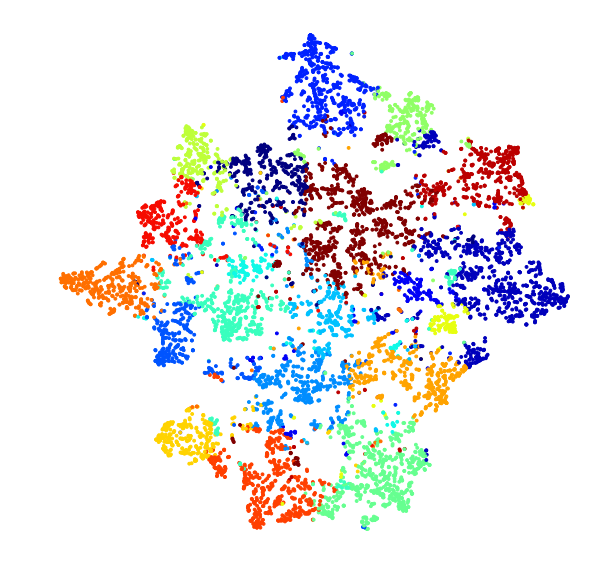

In [103]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.scatter(x_components[:,0], x_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
plt.show()

#### `MDS`

In [ ]:
# Multidimensional Scaling
mds_components = manifold.MDS(n_components=2, random_state=rng).fit_transform(data)

In [ ]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.scatter(mds_components[:,0], mds_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
plt.show()

### Nearest Neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Topic Distribution of PoInf

In [16]:
# Create a new pandas table that merge the lookup_poinf and lookup_pub
# each pub in lookup_pub have a collab_id that have a list of collaborators by id
# We can ignore those that are not in the list of id for PoInf

# Create the list of ids for easy checking:
poinf_id = set(lookup_poinf.index)

# we can now create such an index:
pub_mapping = {str(_id):set() for _id in list(poinf_id)}

for row in lookup_pub.iterrows():
    pub_id = row[0]
    collab_ids = row[1]['collab_id']
    for _id in collab_ids:
        if _id in poinf_id:
            pub_mapping[_id].add(pub_id)

In [17]:
row_list = [{'id':k, 'pub_ids':v} for (k,v) in pub_mapping.items()]

In [18]:
# Add these pub_ids to the pandas df:
df_pubmapping = pd.DataFrame(row_list)

In [19]:
lookup_poinf_more = lookup_poinf.join(df_pubmapping.set_index('id'))

In [37]:
lookup_poinf_more.iloc[20:24]

,last_name,first_name,perseonal_url,position,parent,institute,full_name,institute_class,alias,pub_ids,toks
id,,,,,,,,,,,
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931,steuwer,michel,http://www.research.ed.ac.uk/portal/en/persons...,unknown,institute for computing systems architecture,laboratory for foundations of computer science,steuwer michel,3,"steuwer, m.","{20cb2fdd-6d93-40b9-9cab-e9d818eb166e, b74a3be...","[[highlevel, program, medic, imag, multigpu, s..."
102286ee-5f21-4aed-abfd-e4ea1a615223,oberlander,jon,http://www.research.ed.ac.uk/portal/en/persons...,professor,school of informatics,institute of language cognition and computation,oberlander jon,2,"oberlander, j.","{5be3a6b1-5ee4-4a39-9fff-88b22238fb98, 4629e88...","[[verbal, effect, visual, program, inform, typ..."
10ff8e7a-53b2-4d2f-adad-ef695bc595a7,wen,zhenyu,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,laboratory for foundations of computer science,wen zhenyu,3,"wen, z.","{872e450f-87e9-4956-9678-5b09f3cd4f84, a4cad99...","[[cost, effici, schedul, mapreduc, applic, pub..."
114a78ef-c940-4653-8429-7c2897a96043,jovanovic,jelena,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,institute of language cognition and computation,jovanovic jelena,2,"jovanovic, j.",{b4b0b45d-72d9-4f39-929c-ea451288f253},"[[analyticsbas, framework, support, teach, lea..."


In [43]:
def getToks(pub_ids):
    out = []
    try:
        if len(pub_ids):
            for pub_id in pub_ids:
                out.extend(pub_toks[pub_toks.index == pub_id].summary_toks)
            # Convert the list of lists to a single list:
            out = [tok for tokList in out for tok in tokList]
    except TypeError:
        print(pub_ids)
        
    return out

In [48]:
lookup_poinf_more['summary_toks'] = lookup_poinf_more.apply(lambda row: getToks(row.pub_ids), axis=1)

nan
nan
nan
nan


In [49]:
# Conert to BOW using bowified:
lookup_poinf_more['bow'] = lookup_poinf_more.apply(bowified, axis=1)

In [50]:
lookup_poinf_more['topic_distribution'] = lookup_poinf_more.apply(_inference, axis=1)

In [51]:
lookup_poinf_more.head(2)

,last_name,first_name,perseonal_url,position,parent,institute,full_name,institute_class,alias,pub_ids,toks,summary_toks,bow,topic_distribution
id,,,,,,,,,,,,,,
003ec9bb-18aa-4e6e-95e9-359f0968262a,gray,gavin,http://www.research.ed.ac.uk/portal/en/persons...,research assistant,school of informatics,institute for computing systems architecture,gray gavin,5,NaN,{},[],[],[],"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0..."
010f9bf0-c04c-4cfb-ab3d-ca150de1e706,jackson,paul,http://www.research.ed.ac.uk/portal/en/persons...,senior lecturer,school of informatics,institute for computing systems architecture,jackson paul,5,"jackson, p. b.|jackson, p.","{c5754b06-fcf9-4362-aa3a-1142589b5402, 167c4b6...","[nuprl, use, circuit, design, nuprl, interact,...","[nuprl, use, circuit, design, nuprl, interact,...","[(22, 2), (27, 1), (29, 15), (39, 1), (40, 1),...","[0, 0.326083956289, 0.120584281776, 0.05047796..."


## Clustering